In [70]:
#Importing the neccesarry libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [71]:
df = pd.read_csv(r"C:\Users\HP\Downloads\emails.csv") 

In [72]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [73]:
df.drop('Email No.',axis=1,inplace=True)

In [74]:
df.shape

(5172, 3001)

In [75]:
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [76]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [77]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [80]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier()) 
])

In [81]:
pipeline.fit(X_train,y_train) 

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier())])

In [82]:
pipeline.score(X_train,y_train)

1.0

In [83]:
pipeline.score(X_test,y_test)

0.968365553602812

In [84]:
y_pred = pipeline.predict(X_test) 

In [85]:
from sklearn.metrics import confusion_matrix , classification_report 

<Axes: >

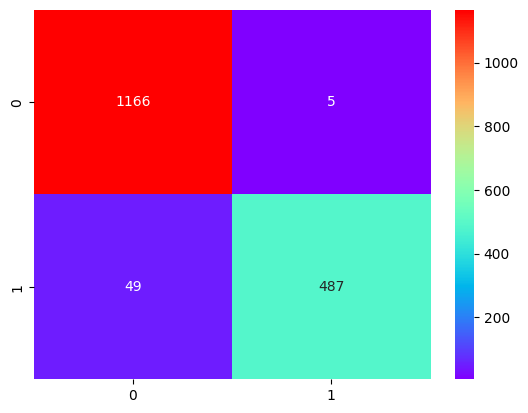

In [93]:
sea = confusion_matrix(y_pred,y_test) 
sns.heatmap(sea,annot=True,fmt='d',cmap='rainbow')

In [87]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      1171\n           1       0.99      0.91      0.95       536\n\n    accuracy                           0.97      1707\n   macro avg       0.97      0.95      0.96      1707\nweighted avg       0.97      0.97      0.97      1707\n'